# Task A2.2: Motion Logging - Acc/Gyr  and Collection (5 points - Mandatory)


In this task, you should record the motion data from Arduino Nano RP2040. 
The frequency of the record is to be at least 2 Hz (0.5 second). 
Record the data for at least 10 minutes (1200 rows or more). You should collect both accelerometer and gyroscope data. 
Wiggle the Arduino slightly and abruptly (!) in different directions and angles (Do both angles and directions!) while collecting the motion, 
to have some peaks in your data. Save them into a CSV. Do the wiggles in certain intervals so you get something like the figure below. 

I- Collect the data in a CSV file and submit it with the rest of your results (2pts-Mandatory)
II- Visualize the data with a line graph with two axes with criteria below (1pt-Mandatory)

- plot 6 axis of data
- Add labels for each axes (Acceleration (m.sq/s.sq), Time(seconds)),
- Turn on the grids 
- Add legend on the top right corner - the name of your plots should be Ax, Ay, Az, Gx, Gy, Gz
- Remember to Submit both CSV and your Python Code.

III- (Manipulate the data) With one of the the functions mentioned in the instruction above, write a code which deletes rows 
of data from your dataset that the acceleration is 0 or close to 0. This will compress your signals to look something like 
the right graphs below in Fig. 9. Visualize the data again with the above criteria in a line graph. Pay attention that you need 
to look at the data and define the threshold accordingly for deleting stationary data. The threshold might be different for different axes  (2pt-Mandatory)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('data.csv')
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")

In [4]:
df[["AccX", "AccY", "AccZ"]] = (
    df["Acc"]
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

In [5]:
df[['GyroX', 'GyroY', 'GyroZ']] = (
    df['Gyro']
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

# II - Visualise the data with a line graph with two axes


Plotting both gyroscope and accelerometer data on the same plot. I used RTC library to get the current real time from the ntp server. The data is saved with the time stamp.

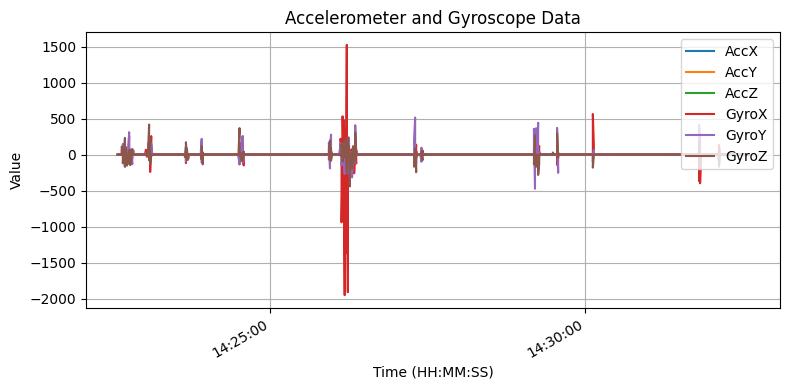

In [6]:
fig, ax = plt.subplots( figsize=(8, 4) )
df.plot(x='Datetime', y='AccX', ax=ax, label='AccX')
df.plot(x='Datetime', y='AccY', ax=ax, label='AccY')
df.plot(x='Datetime', y='AccZ', ax=ax, label='AccZ')
df.plot(x='Datetime', y='GyroX', ax=ax, label='GyroX')
df.plot(x='Datetime', y='GyroY', ax=ax, label='GyroY')
df.plot(x='Datetime', y='GyroZ', ax=ax, label='GyroZ')

plt.title('Accelerometer and Gyroscope Data')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Value')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

Accelerometor data and gyroscope data, but now in two different plots. I believe it's more clear to see the data in two different plots as gyroscope values are much larger than accelerometer values.

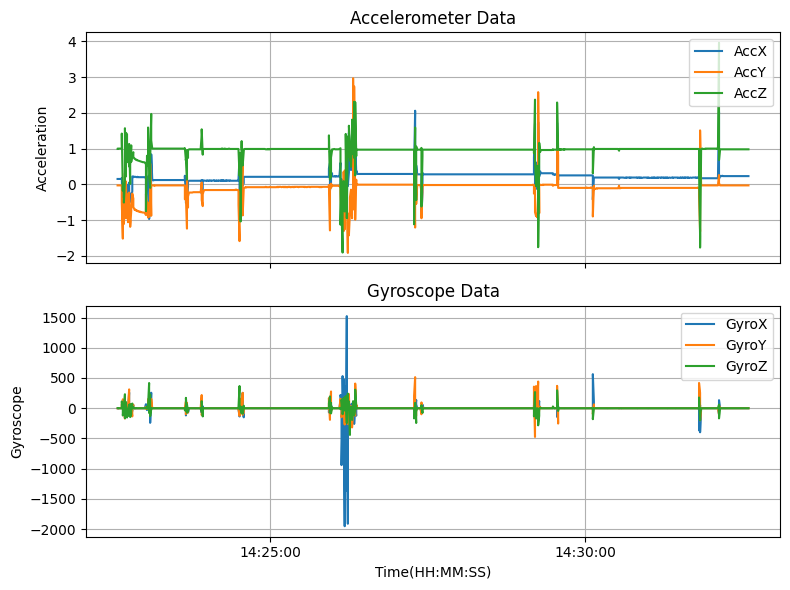

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax1.set_title("Accelerometer Data")
ax1.plot(df["Datetime"], df["AccX"], label="AccX")
ax1.plot(df["Datetime"], df["AccY"], label="AccY")
ax1.plot(df["Datetime"], df["AccZ"], label="AccZ")
ax1.set_ylabel("Acceleration")
ax1.legend(loc="upper right")
ax1.grid()

ax2.set_title("Gyroscope Data")
ax2.plot(df["Datetime"], df["GyroX"], label="GyroX")
ax2.plot(df["Datetime"], df["GyroY"], label="GyroY")
ax2.plot(df["Datetime"], df["GyroZ"], label="GyroZ")
ax2.set_xlabel("Time(HH:MM:SS)")
ax2.set_ylabel("Gyroscope")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()

# III- (Manipulate the data) 

In [ ]:
acc_columns = ["AccX", "AccY", "AccZ"]
gyro_columns = ["GyroX", "GyroY", "GyroZ"]

df_updated = df[(df[acc_columns].abs() > 0.14).all(axis=1)]
df_updated = df_updated.drop(columns=['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Datetime']) # just dropping these duplicates as I used string to split the values

df_updated.to_csv("data_updated.csv", index=False)
df_updated["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")
df_updated = df_updated.drop_duplicates(subset=["Datetime"])

In [9]:
df_updated[["AccX", "AccY", "AccZ"]] = (
    df_updated["Acc"]
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

df_updated[['GyroX', 'GyroY', 'GyroZ']] = (
    df_updated['Gyro']
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

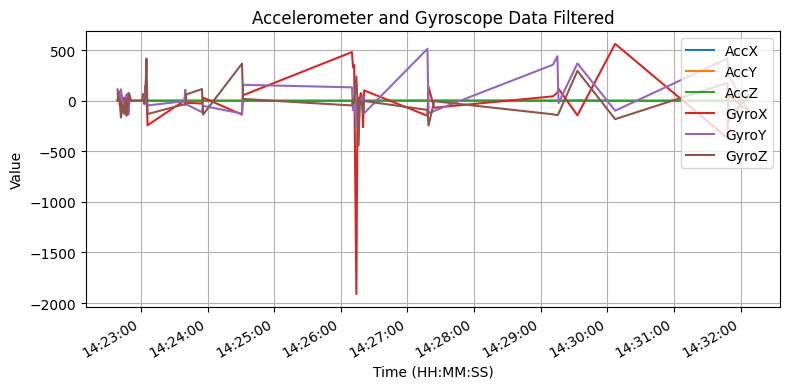

In [15]:
fig, ax = plt.subplots( figsize=(8, 4) )
df_updated.plot(x='Datetime', y='AccX', ax=ax, label='AccX')
df_updated.plot(x='Datetime', y='AccY', ax=ax, label='AccY')
df_updated.plot(x='Datetime', y='AccZ', ax=ax, label='AccZ')
df_updated.plot(x='Datetime', y='GyroX', ax=ax, label='GyroX')
df_updated.plot(x='Datetime', y='GyroY', ax=ax, label='GyroY')
df_updated.plot(x='Datetime', y='GyroZ', ax=ax, label='GyroZ')

plt.title('Accelerometer and Gyroscope Data Filtered')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Value')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


Once again I will plot the acc and gyro data separately, to differentiate them and to visualize them better.

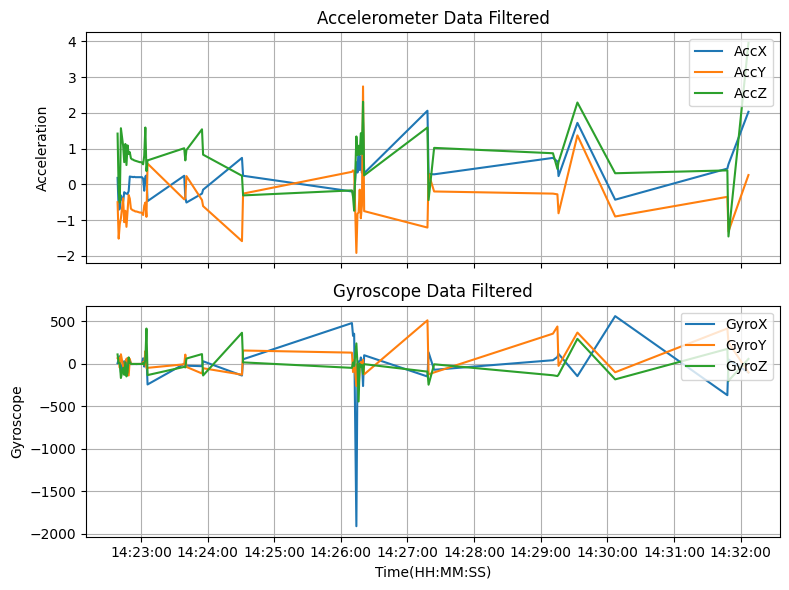

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax1.set_title("Accelerometer Data Filtered")
ax1.plot(df_updated["Datetime"], df_updated["AccX"], label="AccX")
ax1.plot(df_updated["Datetime"], df_updated["AccY"], label="AccY")
ax1.plot(df_updated["Datetime"], df_updated["AccZ"], label="AccZ")
ax1.set_ylabel("Acceleration")
ax1.legend(loc="upper right")
ax1.grid()

ax2.set_title("Gyroscope Data Filtered")
ax2.plot(df_updated["Datetime"], df_updated["GyroX"], label="GyroX")
ax2.plot(df_updated["Datetime"], df_updated["GyroY"], label="GyroY")
ax2.plot(df_updated["Datetime"], df_updated["GyroZ"], label="GyroZ")
ax2.set_xlabel("Time(HH:MM:SS)")
ax2.set_ylabel("Gyroscope")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()

The accelerometer data is a bit tricky to filter out because the gravity force is always present and registered on one of the axes. This makes the accelerometer data less clean compared to the gyroscope data. When inspecting the data, there's always a spike in one of the axes when the microcontroller is stationary, depending on which side it's laying on. To handle this, I simply added a 0.14 threshold for all axes to shrink the data to a more reasonable size.

I believe it would be more useful to filter out the gyroscope data instead, since the gyroscope produces 0 or close to 0 values on all axes when the device isn’t moving. 